In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import copy

from psm_utils.psm import PSM
from psm_utils.psm_list import PSMList
from psm_utils.io import write_file
from deeplc import FeatExtractor



from sklearn.metrics import mean_absolute_error
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import callbacks
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import uniform, randint, pearsonr
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from IPython.display import display
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Dense, Flatten
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Bidirectional, LSTM, Attention
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam

In [2]:
data = pd.read_csv("/home/emmy/Notebooks2/MQ_alignment_output/evidence_aligned_6.csv") #reading in the data
ccs_df = data[['CCS']]
ccs_df.head()

,CCS
0,409.181586
1,675.752631
2,593.085242
3,682.043900
4,492.912110


In [3]:
%matplotlib inline

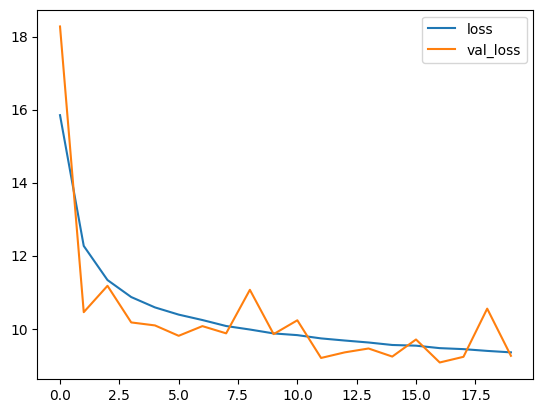

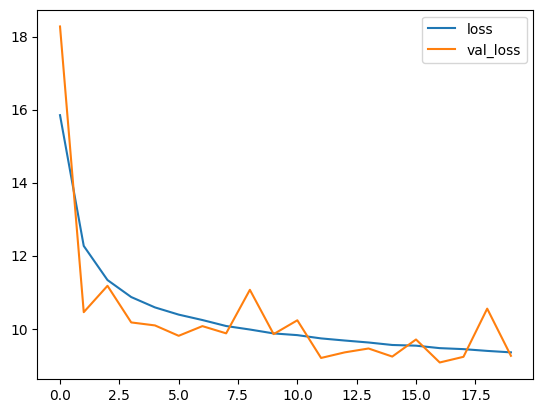

In [5]:
history_df_rnn_mod = pd.read_csv('history_rnn_mod.csv')
history_df_rnn_mod.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


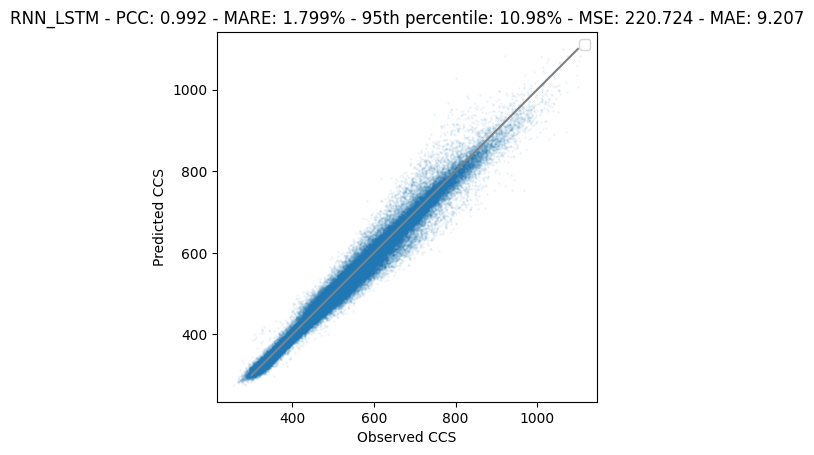

In [4]:
ccs_test_model_rnn_mod = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn_mod.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn_mod["CCS"],
    ccs_test_model_rnn_mod["Model_rnn_mod_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn_mod["Model_rnn_mod_predictions"]
true_ccs = ccs_test_model_rnn_mod["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_LSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3F} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

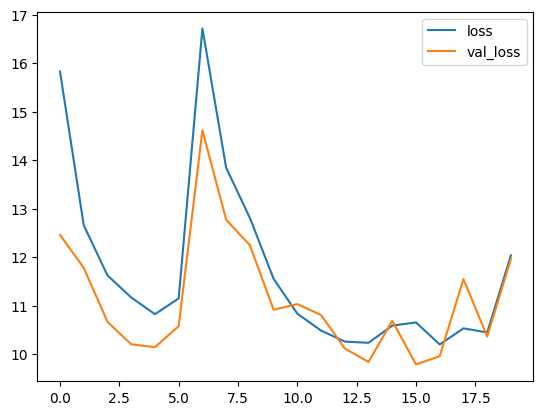

In [4]:
history_df_rnn_mod_gru = pd.read_csv('history_rnn_mod_gru.csv')
history_df_rnn_mod_gru.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


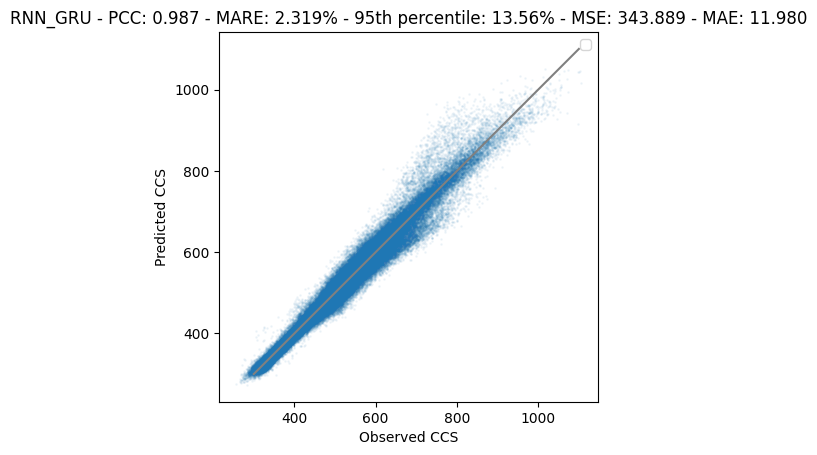

In [7]:
ccs_test_model_rnn_mod_gru = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn_mod_gru.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn_mod_gru["CCS"],
    ccs_test_model_rnn_mod_gru["Model_rnn_mod_gru_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn_mod_gru["Model_rnn_mod_gru_predictions"]
true_ccs = ccs_test_model_rnn_mod_gru["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_GRU - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

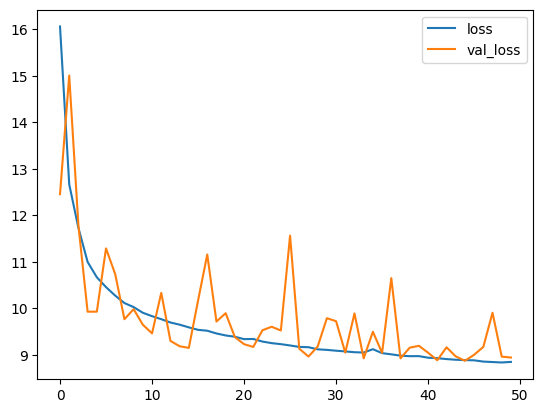

In [4]:
history_df_rnn_mod3 = pd.read_csv('history_rnn_mod3.csv')
history_df_rnn_mod3.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


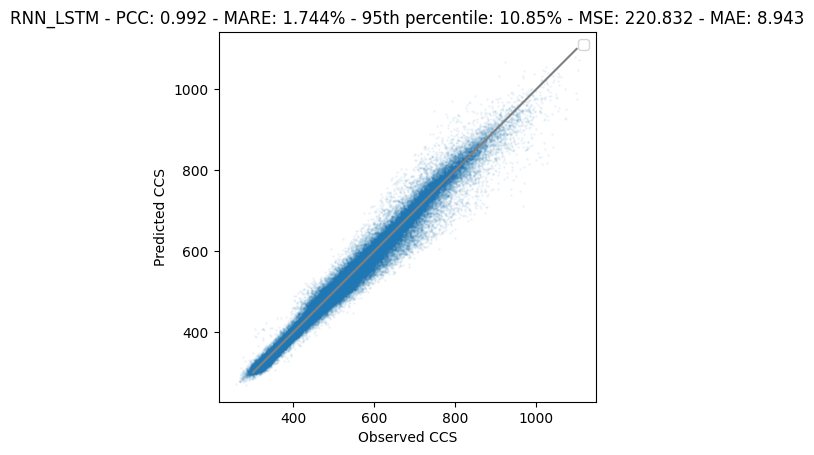

In [8]:
ccs_test_model_rnn_mod3 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn_mod3.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn_mod3["CCS"],
    ccs_test_model_rnn_mod3["Model_rnn_mod3_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn_mod3["Model_rnn_mod3_predictions"]
true_ccs = ccs_test_model_rnn_mod3["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_LSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

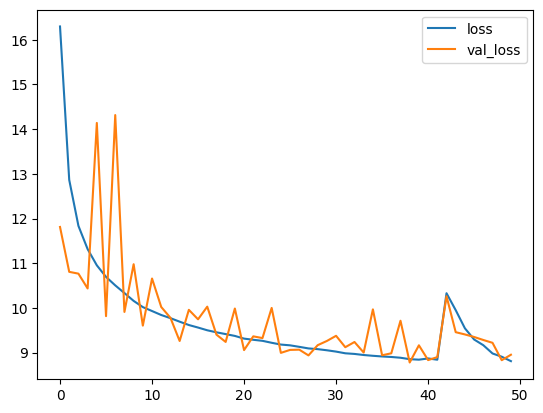

In [16]:
history_df_rnn_mod4 = pd.read_csv('history_rnn_mod4.csv')
history_df_rnn_mod4.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


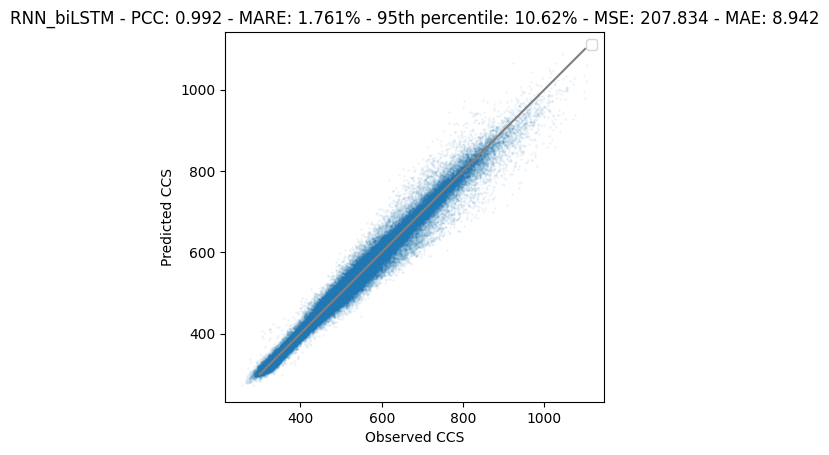

In [9]:
ccs_test_model_rnn_mod4 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn_mod4.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn_mod4["CCS"],
    ccs_test_model_rnn_mod4["Model_rnn_mod4_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn_mod4["Model_rnn_mod4_predictions"]
true_ccs = ccs_test_model_rnn_mod4["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

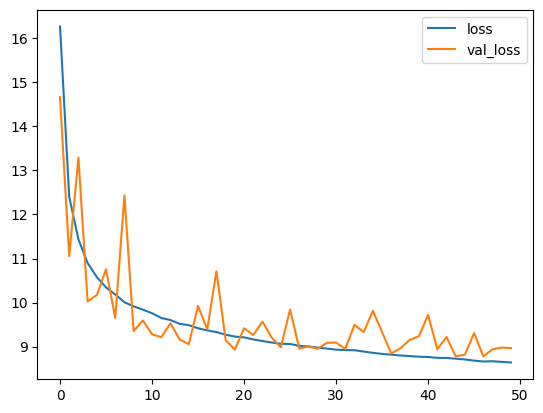

In [4]:
history_df_rnn_mod5 = pd.read_csv('history_rnn_mod5.csv')
history_df_rnn_mod5.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


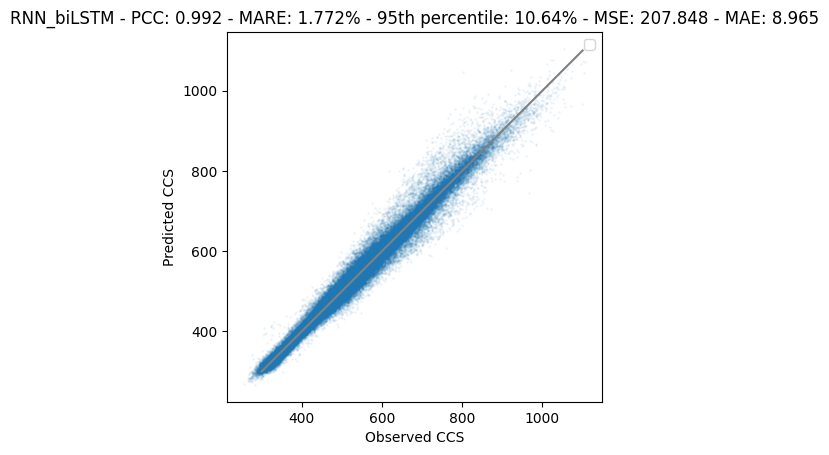

In [12]:
ccs_test_model_rnn_mod5 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn_mod5.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn_mod5["CCS"],
    ccs_test_model_rnn_mod5["Model_rnn_mod5_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn_mod5["Model_rnn_mod5_predictions"]
true_ccs = ccs_test_model_rnn_mod5["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

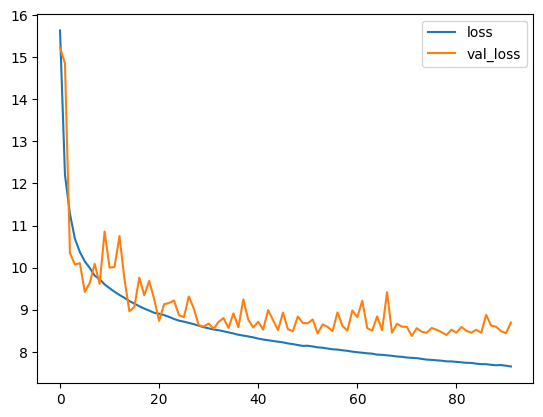

In [5]:
history_df_rnn_mod6 = pd.read_csv('history_rnn_mod6.csv')
history_df_rnn_mod6.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


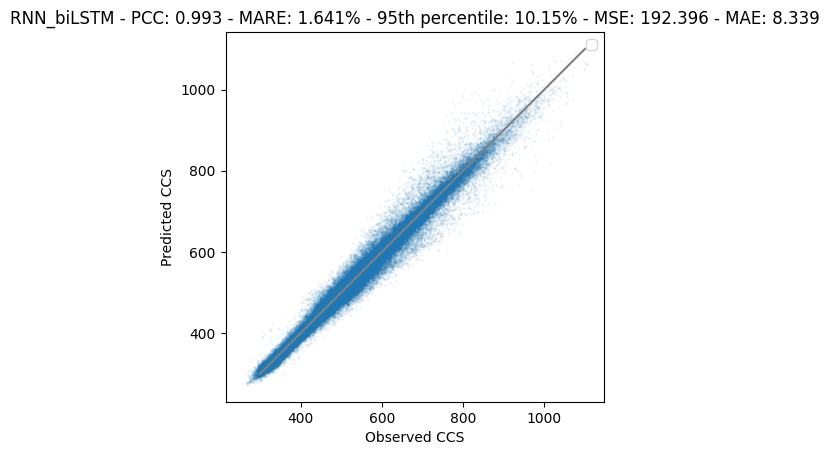

In [13]:
ccs_test_model_rnn_mod6 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn_mod6.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn_mod6["CCS"],
    ccs_test_model_rnn_mod6["Model_rnn_mod6_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn_mod6["Model_rnn_mod6_predictions"]
true_ccs = ccs_test_model_rnn_mod6["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

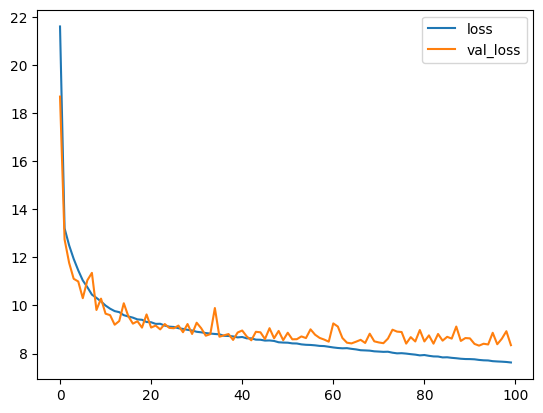

In [8]:
history_df_rnn_mod7 = pd.read_csv('history_rnn_mod7.csv')
history_df_rnn_mod7.loc[:, ['loss', 'val_loss']].plot();



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


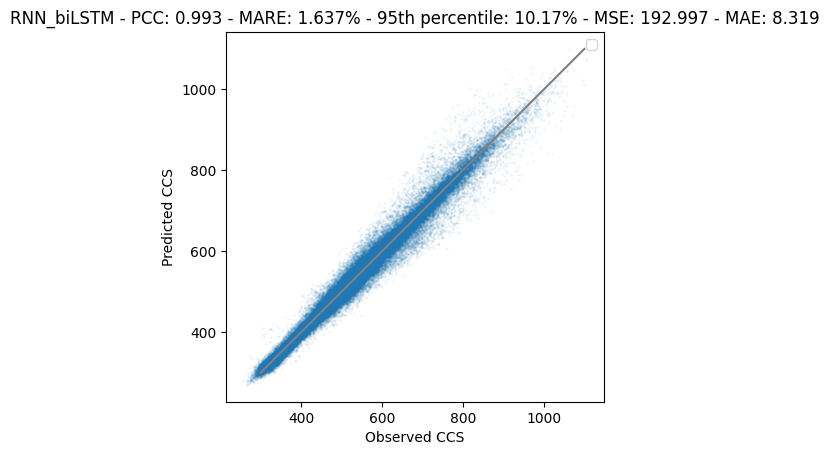

In [14]:
ccs_test_model_rnn_mod7 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn_mod7.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn_mod7["CCS"],
    ccs_test_model_rnn_mod7["Model_rnn_mod7_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn_mod7["Model_rnn_mod7_predictions"]
true_ccs = ccs_test_model_rnn_mod7["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

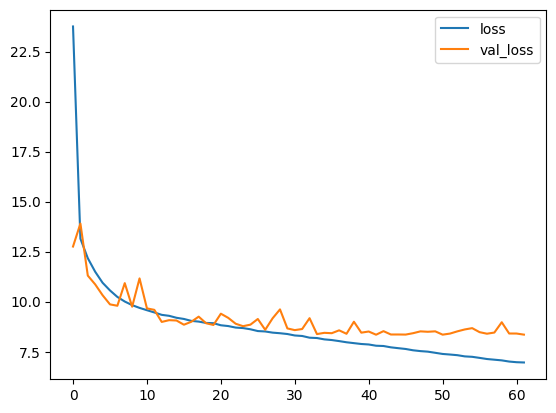

In [11]:
history_df_rnn_mod9 = pd.read_csv('history_rnn_mod9.csv')
history_df_rnn_mod9.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


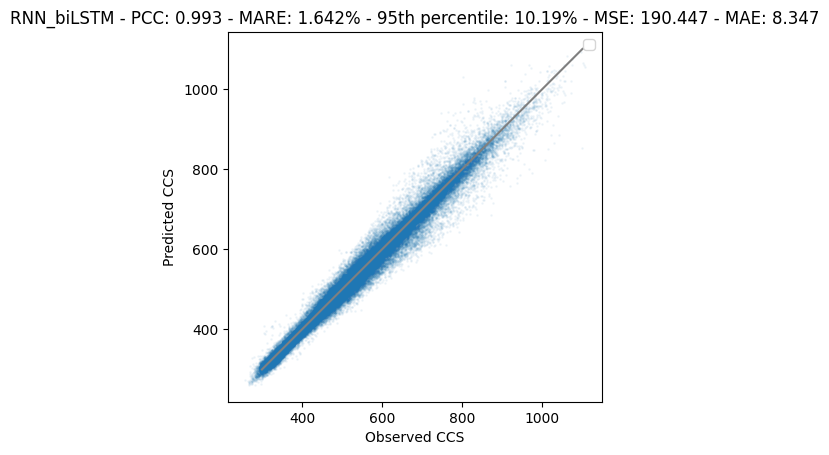

In [15]:
ccs_test_model_rnn_mod9 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn_mod9.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn_mod9["CCS"],
    ccs_test_model_rnn_mod9["Model_rnn_mod9_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn_mod9["Model_rnn_mod9_predictions"]
true_ccs = ccs_test_model_rnn_mod9["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()